# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [1]:
import os

os.chdir('C:/Users/ME/Documents/QBIO/sp24_cw/qbio_490_dgmarsha/analysis_data')

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the cancer you'll be working with. 
4. Load it into our python environment.

In [ ]:
# 1. Import cptac

import cptac

# 2. Examine the data sets available with list_datasets()
list = cptac.list_datasets()
print(list["Cancer"])
output = []
for x in list["Cancer"]:
    if x not in output:
        output.append(x)
print(output)

In [7]:
# 3. Download the cancer data set -- fill in dataset!
#cptac.download(dataset="Lscc") #Doesn't work.

# 4. Load the cancer data
# ie. brca = cptac.Brca()
lscc = cptac.Lscc()

Now, we have our object containing a bunch of data. We can use the list_data() function the data available for the cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the omics which we have already seen for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the object to examine the different data contained in the object. Much like calling functions from a package, we can use the cancer.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [247]:
# Run the list_data() function
lscc.list_data_sources() #list_data() doesn't work.
#list_data() didn't work, but based on the number of rows in proteomics, 212.

,Data type,Available sources
0,CNV,"[bcm, washu]"
1,circular_RNA,[bcm]
2,miRNA,"[bcm, washu]"
3,phosphoproteomics,"[bcm, umich]"
4,proteomics,"[bcm, umich]"
5,transcriptomics,"[bcm, broad, washu]"
6,ancestry_prediction,[harmonized]
7,somatic_mutation,"[harmonized, washu]"
8,clinical,[mssm]
9,follow-up,[mssm]


**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [236]:
protein_data = lscc.get_proteomics('umich') # get the proteomics data
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 

rna_data.columns.get_level_values(0)

Index(['A1BG', 'A1BG', 'A1BG', 'A1BG', 'A1BG', 'A1BG-AS1', 'A1BG-AS1',
       'A1BG-AS1', 'A1BG-AS1', 'A1BG-AS1',
       ...
       'ZZEF1', 'ZZEF1', 'ZZEF1', 'ZZEF1', 'ZZEF1', 'ZZEF1', 'ZZEF1', 'ZZEF1',
       'hsa-mir-1253', 'hsa-mir-423'],
      dtype='object', name='Name', length=225997)

In [243]:
#rna_data.columns = rna_data.columns.get_level_values(0)

## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [22]:
# import packages here
import numpy as np
import pandas as pd

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame? 212 rows, 13715 columns.
* What do the rows and columns represent? The rows are patient samples and the columns are protein levels.
* How many patients are there? 212
* What about proteins? 13715, though the unique fxn says there are 12759. Some are repeats, supposedly.

In [37]:
## Explore the data frame here and answer questions
print(protein_data.axes)
print(protein_data.index)
print(protein_data.columns)
print(protein_data.shape)
len(np.unique(protein_data.columns))

[Index(['C3L-00081', 'C3L-00415', 'C3L-00445', 'C3L-00568', 'C3L-00603',
       'C3L-00904', 'C3L-00923', 'C3L-00927', 'C3L-00965', 'C3L-00993',
       ...
       'C3N-03851.N', 'C3N-03875.N', 'C3N-03877.N', 'C3N-03880.N',
       'C3N-03882.N', 'C3N-03886.N', 'C3N-04124.N', 'C3N-04127.N',
       'C3N-04155.N', 'C3N-04162.N'],
      dtype='object', name='Patient_ID', length=212), Index(['ARF5', 'M6PR', 'ESRRA', 'FKBP4', 'NDUFAF7', 'FUCA2', 'DBNDD1',
       'HS3ST1', 'SEMA3F', 'CFTR',
       ...
       'SCRIB', 'WIZ', 'PRX', 'LDB1', 'WIZ', 'TSGA10', 'RFX7', 'MSANTD2',
       'SVIL', 'ADGRL2'],
      dtype='object', name='Name', length=13715)]
Index(['C3L-00081', 'C3L-00415', 'C3L-00445', 'C3L-00568', 'C3L-00603',
       'C3L-00904', 'C3L-00923', 'C3L-00927', 'C3L-00965', 'C3L-00993',
       ...
       'C3N-03851.N', 'C3N-03875.N', 'C3N-03877.N', 'C3N-03880.N',
       'C3N-03882.N', 'C3N-03886.N', 'C3N-04124.N', 'C3N-04127.N',
       'C3N-04155.N', 'C3N-04162.N'],
      dtype='object', na

12759

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [ ]:
protein_data.loc["patient ID","protein name"] # this is the general case, you have to fill in actual IDs/protein names

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [ ]:
## Answer question in comment form here
#Because of the log2 normalization, a number below 0 represents less expression,
#and a number above zero represents higher relative expression.

**Exericse 2.4**

Print the relative fold change of 5th patient in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [41]:
## write code here
protein_data.loc[protein_data.index[4],"TP53"]
#This patient has about half as much protein expression as the reference. SO lower.

-1.0421482528652035

### Using Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [42]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

,nums
0,0
1,1
2,2
3,3
4,4
5,5


In [43]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

,nums
0,False
1,True
2,False
3,True
4,False
5,True


In [44]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

,nums,boolean_vector
0,0,False
1,1,True
2,2,False
3,3,True
4,4,False
5,5,True


In [248]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array


,nums,boolean_vector,parity
0,0,False,Even
1,1,True,Odd
2,2,False,Even
3,3,True,Odd
4,4,False,Even
5,5,True,Odd


**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins? There are 21 patients with high TP53, I believe. The protein information is in the columns.
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of `TP53` and average expression of `ARF1`?
   7, but note my inconsistent use of level. High TP53 means expression at least 2x the slcc average, but I have used average for ARF1 to mean expression in between the 30th and 70th percentiles.

In [85]:
# write code here
high_TP53 = protein_data.loc[protein_data.loc[:,"TP53"]>=1, :]
high_TP53
print(sum(protein_data.loc[:,"TP53"]>=1))
print(len(high_TP53))
highMark = np.nanpercentile(protein_data["ARF1"],70)
lowMark=np.nanpercentile(protein_data["ARF1"],30)
print("High Mark at 70th percentile:",highMark)
print("Low Mark at 30th percentile:",lowMark)
# ARF1_level = np.where(high_TP53.loc[:,"ARF1"]>=highMark,"High", "hold")
# ARF1_level = np.where(high_TP53.loc[:,"ARF1"]=="hold" and high_TP53.loc[:,"ARF1"]<=lowMark, "Low", "Average")
# print(ARF1_level)
#high_TP53["ARF1 Level"] =ARF1_level
high_TP53["ARF1 Level"] = np.where(high_TP53["ARF1"]>=highMark,"High",np.where(high_TP53["ARF1"]<=lowMark, "Low", "Average"))
print(sum(high_TP53["ARF1 Level"]=="Average"))
#Strange warning, tried and failed to get around it.

21
21
High Mark at 70th percentile: 0.27911008804779414
Low Mark at 30th percentile: -0.04973956423358388
7


C:\Users\ME\AppData\Local\Temp\ipykernel_1788\3963448005.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_TP53["ARF1 Level"] = np.where(high_TP53["ARF1"]>=highMark,"High",np.where(high_TP53["ARF1"]<=lowMark, "Low", "Average"))


## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the object. The function name is very similar in syntax to the get_proteomics() function from before!

In [93]:
rna_data = lscc.get_dataframe("transcriptomics","broad")
clinical_data = lscc.get_clinical("mssm")

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Each column contains informationabout one gene, but I don't know if they represent counts or levels. I didn't find any information on it.
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?
* No, though the sources of the data is inconsistent, which could be the cause.

In [232]:
# explore the data frames using shape, axes, and other functions we've gone over.
print(rna_data.axes)
print(rna_data.index)
print(rna_data.columns)
print(rna_data.shape)


print(clinical_data.axes)
print(clinical_data.index)
print(clinical_data.columns)
print(clinical_data.shape)


MultiIndex([(        'A1BG', 'ENST00000263100.8', 'ENSG00000121410.12'),
            (        'A1BG', 'ENST00000595014.1', 'ENSG00000121410.12'),
            (        'A1BG', 'ENST00000596924.1', 'ENSG00000121410.12'),
            (        'A1BG', 'ENST00000598345.1', 'ENSG00000121410.12'),
            (        'A1BG', 'ENST00000600966.1', 'ENSG00000121410.12'),
            (    'A1BG-AS1', 'ENST00000593374.5',  'ENSG00000268895.6'),
            (    'A1BG-AS1', 'ENST00000593960.5',  'ENSG00000268895.6'),
            (    'A1BG-AS1', 'ENST00000594950.5',  'ENSG00000268895.6'),
            (    'A1BG-AS1', 'ENST00000595302.1',  'ENSG00000268895.6'),
            (    'A1BG-AS1', 'ENST00000599728.5',  'ENSG00000268895.6'),
            ...
            (       'ZZEF1', 'ENST00000572426.5', 'ENSG00000074755.15'),
            (       'ZZEF1', 'ENST00000572699.1', 'ENSG00000074755.15'),
            (       'ZZEF1', 'ENST00000572831.1', 'ENSG00000074755.15'),
            (       'ZZEF1', 'ENST0

The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
<br></br>
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [119]:
# write code here
clinical_data.loc[:,"age"]=[int(age) for age in clinical_data.loc[:,"age"]]

clinical_data["over50"] = (clinical_data["age"])>50
masked_clinical=clinical_data.loc[clinical_data["over50"]==True,:]

Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [135]:
# 1.
name_intersects = [
    np.intersect1d(protein_data.index,rna_data.index),   # 0. fill in intersecting for protein/rna here using intersect1d()
   np.intersect1d(protein_data.index,masked_clinical.index) , # 1. fill in intersecting for protein/masked clinical here
    np.intersect1d(rna_data.index,masked_clinical.index), # 2. fill in the intersecting for rna/masked clinical here
]

# 2. Print the lengths here
# write a for loop here
for intersect in name_intersects:
    print(f"The length of the intersection is",len(intersect)) # fill in here

# 3. Which comparison(s) contain the patient names that have all three levels?
#The latter two.
len(name_intersects[1]==name_intersects[2])

The length of the intersection is 207
The length of the intersection is 105
The length of the intersection is 105


105

## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [140]:
# write code here
(clinical_data).head()

Name,tumor_code,discovery_study,type_of_analyzed_samples,confirmatory_study,type_of_analyzed_samples,age,sex,race,ethnicity,ethnicity_race_ancestry_identified,...,additional_treatment_immuno_for_new_tumor,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_loco-regional,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_metastasis,"Recurrence-free survival, days","Recurrence-free survival from collection, days","Recurrence status (1, yes; 0, no)","Overall survival, days","Overall survival from collection, days","Survival status (1, dead; 0, alive)",over50
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00081,LSCC,Yes,Tumor_and_Normal,NaN,NaN,61,Female,White,Not Hispanic or Latino,White,...,No,209.0,209.0,188.0,188.0,1,473.0,473.0,1.0,True
C3L-00415,LSCC,Yes,Tumor_and_Normal,NaN,NaN,64,Female,White,Not Hispanic or Latino,White,...,No,NaN,NaN,356.0,356.0,1,1786.0,1786.0,0.0,True
C3L-00445,LSCC,Yes,Tumor_and_Normal,NaN,NaN,74,Male,Unknown,Unknown,Caucasian,...,NaN,NaN,NaN,NaN,NaN,0,3.0,3.0,1.0,True
C3L-00568,LSCC,Yes,Tumor_and_Normal,NaN,NaN,74,Female,White,Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,0,93.0,93.0,0.0,True
C3L-00603,LSCC,Yes,Tumor_and_Normal,NaN,NaN,72,Male,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,0,1794.0,1794.0,0.0,True


**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [147]:
# convert ages here!
#What would give me that impression?
max(clinical_data["age"]) # 88 is a reasonable number for age. I am to think these are all children and infants?
clinical_data["Wrong Age"] = clinical_data["age"]/12
(clinical_data).head()

Name,tumor_code,discovery_study,type_of_analyzed_samples,confirmatory_study,type_of_analyzed_samples,age,sex,race,ethnicity,ethnicity_race_ancestry_identified,...,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_loco-regional,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_metastasis,"Recurrence-free survival, days","Recurrence-free survival from collection, days","Recurrence status (1, yes; 0, no)","Overall survival, days","Overall survival from collection, days","Survival status (1, dead; 0, alive)",over50,Wrong Age
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00081,LSCC,Yes,Tumor_and_Normal,NaN,NaN,61,Female,White,Not Hispanic or Latino,White,...,209.0,209.0,188.0,188.0,1,473.0,473.0,1.0,True,5.083333
C3L-00415,LSCC,Yes,Tumor_and_Normal,NaN,NaN,64,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,356.0,356.0,1,1786.0,1786.0,0.0,True,5.333333
C3L-00445,LSCC,Yes,Tumor_and_Normal,NaN,NaN,74,Male,Unknown,Unknown,Caucasian,...,NaN,NaN,NaN,NaN,0,3.0,3.0,1.0,True,6.166667
C3L-00568,LSCC,Yes,Tumor_and_Normal,NaN,NaN,74,Female,White,Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,0,93.0,93.0,0.0,True,6.166667
C3L-00603,LSCC,Yes,Tumor_and_Normal,NaN,NaN,72,Male,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,0,1794.0,1794.0,0.0,True,6.0


There may be control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [157]:
# Get the levels of the Sample_Tumor_Normal column with unique()
np.unique(clinical_data.columns)
#There is no such column.

Patient_ID
C3L-00081     Stage II
C3L-00415     Stage II
C3L-00445     Stage II
C3L-00568      Stage I
C3L-00603      Stage I
               ...    
C3N-03886      Stage I
C3N-04124      Stage I
C3N-04127    Stage III
C3N-04155      Stage I
C3N-04162     Stage II
Name: tumor_stage_pathological, Length: 110, dtype: object

__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time, seaborn is sns).
   2. Create an age_category column in clinical_data. Define "Young" as under the median age, and "Old" as the median age and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for soome of these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to remove any patients with NaN values in "Stage".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Use the skeleton code to draw the barplot. Do your numbers make sense?

(110, 127)
['Stage I' 'Stage II' 'Stage III' 'Stage IV']
107
Old
Stage I
53
Stage II
53
Stage III
53
Stage IV
53
Young
Stage I
54
Stage II
54
Stage III
54
Stage IV
54


<Axes: xlabel='age_category', ylabel='count'>

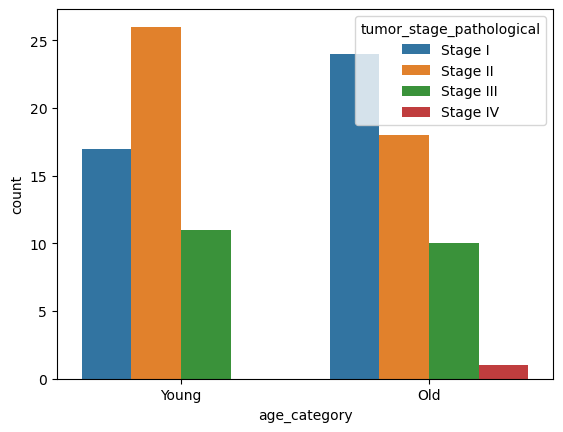

In [202]:
# 1. Import libraries here
import matplotlib.pyplot as plt
import seaborn as sns
# 2. Create the age_category column in clinical_data
median = np.median(clinical_data["age"])
clinical_data["age_category"] = np.where(clinical_data["age"]>=median,"Old","Young")
print(clinical_data.shape)
# 3. Filter our NaN
clean_clinical_data = clinical_data.loc[pd.isna(clinical_data['tumor_stage_pathological'])!=True,:]
clean_clinical_data = clean_clinical_data.loc[(clean_clinical_data['tumor_stage_pathological'])!='Staging is not applicable or unknown',:]
print(np.unique(clean_clinical_data['tumor_stage_pathological']))
## this will programatically get all the stages in order - it does no such thing.
stage_categories = np.unique(clean_clinical_data.loc[:, 'tumor_stage_pathological'])#Had to change Stage to tumor_stage_pathological, which exists.
assert(np.all(stage_categories == ['Stage I' ,'Stage II' ,'Stage III', 'Stage IV']))#adjusted names to fit cancer
# 4. Loop through all the stage categories and count
print(len(clean_clinical_data.loc[:, 'tumor_stage_pathological'] == "Stage III"))

for age_cat in ["Old", "Young"]: # first get the old data, then the young data
    print(age_cat)
    # fill this in with the cancer category:
    
    for stage in stage_categories:
        print(stage)
        subset = clean_clinical_data.loc[clean_clinical_data['age_category']==age_cat,:]
        print(len(subset["tumor_stage_pathological"]==stage))
        
        # 1. create a subset of the data frame with the old/young patients
        # 2. count the number of patients with the stage of cancer and print
#Always thinks 53 or 54, don't know why.

        
# 5. Create a barplot to compare your results
sns.countplot(
    x = "age_category",
    hue = "tumor_stage_pathological",
    hue_order = stage_categories,
    data = clean_clinical_data
)

# plt.show()

## (5) Plotting Proteomic Data

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 5.1** Plot the expression data of a chosen protein stratified between patients older and younger than the median age.

In [228]:
overlap = np.intersect1d(protein_data.index,clinical_data.index)
overlap_indices = [index in overlap for index in protein_data.index]
overlap_protein_data = protein_data.loc[overlap_indices,:]
print(overlap_protein_data.shape)
overlap_indices = [index in overlap for index in clinical_data.index]
protein_order_age_category=[clinical_data.loc[index,"age_category"] for index in overlap_protein_data.index]#to mind order
young_mask = [age=="Young" for age in protein_order_age_category] # look at the columns of the clinical data to see what column to get age information
old_mask = [age=="Old" for age in protein_order_age_category]

young = (overlap_protein_data.loc[young_mask,"TP53"]).dropna()
old = (overlap_protein_data.loc[old_mask,"TP53"]).dropna()

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data


(110, 13715)


[array([ 1.65837318, -0.23975538, -1.04214825, -0.86343219, -0.85983729,
         0.38179471, -1.40160808, -1.11759567,  1.9111415 , -0.07828058,
         0.77043845, -1.13892686, -0.51499368, -0.53608439,  1.08379292,
         0.24747504, -0.9141349 , -1.12337444,  0.6268842 , -0.2145851 ,
         1.18604267, -1.10813811, -0.91490068, -0.59876295, -1.24723363,
         1.74910867,  1.08624413,  0.73756593,  0.88293485, -1.00774743,
        -1.70595065, -1.31435824,  0.50590278,  0.11531599,  1.24485438,
         0.72338635, -1.69014716,  0.54028537, -1.34654078,  0.55126424,
         0.92470863, -0.64372188, -0.63395848, -1.07311899,  0.55639996,
        -0.86781424, -0.55267052, -0.61274758, -0.64882075, -1.15687321,
        -1.27199652,  1.26352171, -1.54156974,  1.75489192,  0.99279429]),
 array([ 1.26323419, -0.21218489, -1.84128317,  0.93029627,  0.11284051,
        -0.47760654, -0.69536047,  0.41420482, -1.16354085,  0.66427573,
         2.34469259, -0.26810408,  0.19561263, -0

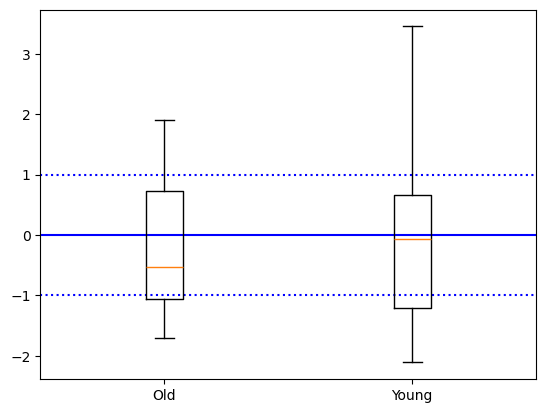

In [229]:
fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(data) # data goes here
plt.xticks([1, 2], ["Old", "Young"]) # use \n for new line if desired


plt.show()

**Exercise 5.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [ ]:
# answer in a comment here
#The -1 line represents an expression level half the reference in log 2 fold change.
#The 0 line represents values at the reference and 1 the values double the reference.

## (6) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [230]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

For some cancer, patients doesn't have clinical or transcriptomic data in CPTAC. We need to use intersect1d() to fix this. We also need to use intersect1d() to determine which genes are shared.

**Exercise 6.1** To make sure the data frames match:

1. Identify patients that are shared between transcriptomic and proteomics data (hint: use intersect1d()). 
2. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
3. Create the rna_shared and prot_shared data frames; ie dataframes with only genes and patients that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [235]:
rna_data

Name                        A1BG                                        \
Transcript_ID  ENST00000263100.8  ENST00000595014.1  ENST00000596924.1   
Database_ID   ENSG00000121410.12 ENSG00000121410.12 ENSG00000121410.12   
Patient_ID                                                               
C3L-00081                   0.00               0.00               0.02   
C3L-00415                   0.00               0.00               0.00   
C3L-00445                   0.00               0.02               0.05   
C3L-00503                   0.00               0.02               0.10   
C3L-00568                   0.00               0.06               0.18   
...                          ...                ...                ...   
C3N-03880.N                 0.00               0.02               0.05   
C3N-03882.N                 0.00               0.02               0.09   
C3N-04124.N                 0.00               0.02               0.05   
C3N-04127.N                 0.00               0.03               0.11   
C3N-04162.N                 0.02               0.00               0.02   

Name                                                         A1BG-AS1  \
Transcript_ID  ENST00000598345.1  ENST00000600966.1 ENST00000593374.5   
Database_ID   ENSG00000121410.12 ENSG00000121410.12 ENSG00000268895.6   
Patient_ID                                                              
C3L-00081                   1.98               0.00               0.0   
C3L-00415                   1.59               0.04               0.0   
C3L-00445                   2.46               0.00               0.0   
C3L-00503                   4.69               0.00               0.0   
C3L-00568                   2.25               0.00               0.0   
...                          ...                ...               ...   
C3N-03880.N                 2.77               0.00               0.0   
C3N-03882.N                 2.11               0.00               0.0   
C3N-04124.N                 1.37               0.06               0.0   
C3N-04127.N                 2.11               0.00               0.0   
C3N-04162.N                 1.37               0.00               0.0   

Name                                                                 \
Transcript_ID ENST00000593960.5 ENST00000594950.5 ENST00000595302.1   
Database_ID   ENSG00000268895.6 ENSG00000268895.6 ENSG00000268895.6   
Patient_ID                                                            
C3L-00081                  0.00              0.00              0.00   
C3L-00415                  0.00              0.00              0.00   
C3L-00445                  0.08              0.08              0.10   
C3L-00503                  0.14              0.00              0.06   
C3L-00568                  0.21              0.00              0.14   
...                         ...               ...               ...   
C3N-03880.N                0.19              0.00              0.30   
C3N-03882.N                0.00              0.00              0.12   
C3N-04124.N                0.22              0.15              0.21   
C3N-04127.N                0.21              0.00              0.23   
C3N-04162.N                0.00              0.25              0.33   

Name                             ...              ZZEF1                     \
Transcript_ID ENST00000599728.5  ...  ENST00000572426.5  ENST00000572699.1   
Database_ID   ENSG00000268895.6  ... ENSG00000074755.15 ENSG00000074755.15   
Patient_ID                       ...                                         
C3L-00081                  0.00  ...               0.35               0.84   
C3L-00415                  0.00  ...               0.25               0.43   
C3L-00445                  0.00  ...               0.50               0.34   
C3L-00503                  0.00  ...               0.71               0.86   
C3L-00568                  0.00  ...               0.74               1.13   
...                      

In [305]:
# 1. Identify the patients shared between RNA and protein data.
shared_patients_prot = np.intersect1d(protein_data.index,rna_data.index)

# 2. Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = np.intersect1d(protein_data.columns,np.unique(rna_data.columns))
shared_rna_prot
# 3. Create the two data frames
shared_genes = []
used_genes =set()
for gene in rna_data.columns:
    if (gene not in used_genes and gene in shared_rna_prot):
        used_genes.add(gene)
        shared_genes.append(True)
    else:
        shared_genes.append(False)
#Excluding duplicates by only looking at the first.
#duplicate proteins too.
shared_prot = []
used_prot =set()
for prot in protein_data.columns:
    if (prot not in used_prot and prot in shared_rna_prot):
        used_prot.add(prot)
        shared_prot.append(True)
    else:
        shared_prot.append(False)

#rna has a duplicate patient id too.
rna_indices = []
used_ids =set()
# count =0
for id in rna_data.index:
    
    if (id not in used_ids and id in shared_patients_prot):
        # if(count>46 and count<59):
        #     print(used_ids)
        #     print(id)
        used_ids.add(id)   
        rna_indices.append(True)
        
        # count = count+1
    else:
        rna_indices.append(False)
    
rna_shared = rna_data.loc[rna_indices, shared_genes]
prot_shared = protein_data.loc[[index in shared_patients_prot for index in protein_data.index],shared_prot]



Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 6.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [284]:
# print([str(i)+str(rna_shared.index[i]==prot_shared.index[i]) for i in range(207)])
print(rna_shared.shape)
print(prot_shared.shape)
print(rna_shared.index[47])
print(prot_shared.index[47])
print(rna_shared.index[48])
print(prot_shared.index[48])
print(rna_shared.index[49])
print(prot_shared.index[49])


(207, 12754)
(207, 12754)
C3L-03961
C3L-03961
C3L-03962
C3L-03962
C3L-03963
C3L-03963
12754


In [285]:
# we need the nan_policy="omit" to throw out NaN values
corr, pval = stats.spearmanr(rna_shared["TP53"], prot_shared["TP53"], nan_policy="omit")

print(f"The correlation of TP53 is {round(corr, 3)} (p = {round(pval, 10)}).")

The correlation of TP53 is 0.675 (p = 0.0).


**Exercise 6.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

In [ ]:
# answer in a comment here
#The Spearman correlation of TP53 is 0.675 (p = 0.0). This means that the variables have a 
#positive relationship, a movement in one is correlated with a movement in the same direction
#from the other. The closeness of the number to 1 indeicates the strength of the relationship 
#and the low p value means this result is significant. TP53 is an important tumour suppressor,
#so its levels matter a lot in cells. That there is a decently strong correlation means most 
#are able to turn transcripts into protein, which is good.

## (7) Heatmaps
**Exercise 7.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

20

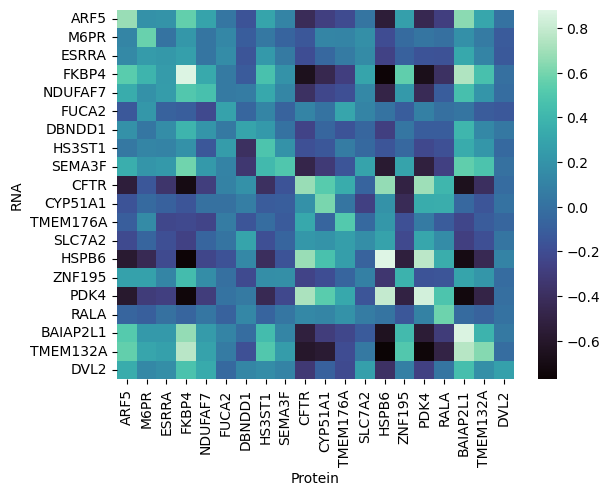

In [294]:
ncomparisons = 20 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
gene_names = prot_shared.columns[0:ncomparisons] # get the first ncomparisons gene names


# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons)), #removed , dtype=np.float16, caused warnings.
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        corr,pval= stats.spearmanr(rna_shared[g1], prot_shared[g2], nan_policy="omit")
        corr_df.loc[g1,g2] = float(corr)

# 3. create the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()

# 4. interpret!
#The light diagonal left top to right is expected, that is the correlation between RNA and protein of the same gene. mRNA, if unimpeded, directly creates 
#its own protein, so there should be a strong positive relationship represented as pale squares, high correlation.

## (8) More with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

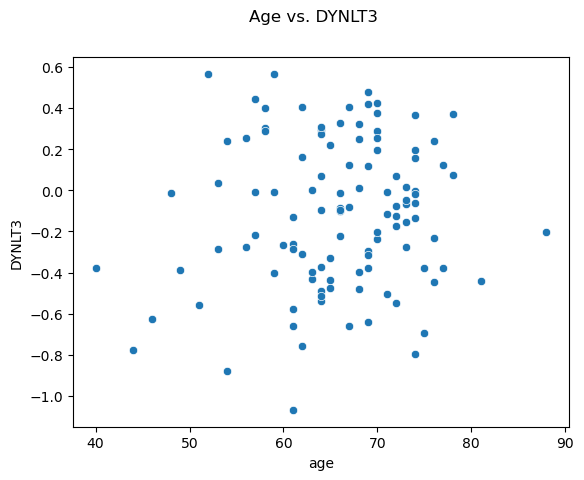

In [296]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "age"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

plt.show()

**Exercise 8.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing

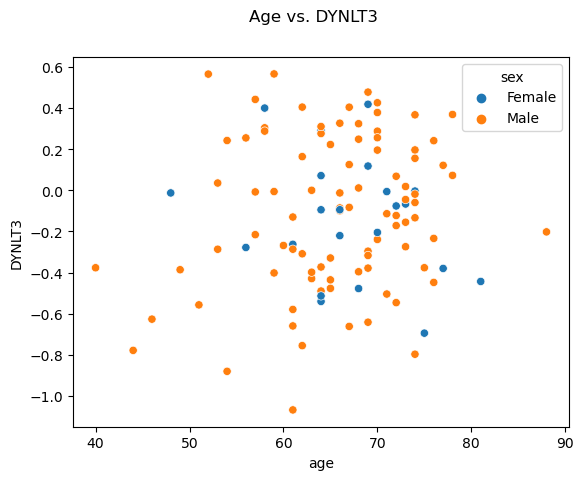

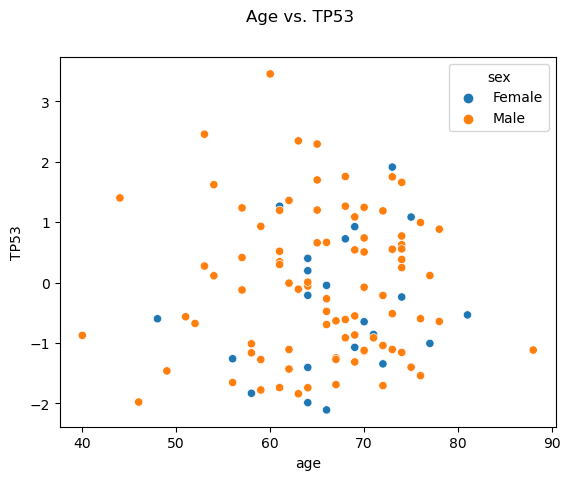

In [299]:
# create plot here
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "age"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    hue = clinical_data.loc[:, "sex"],
    legend = "full", 
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "age"],
    y = protein_data.loc[:, "TP53"],# y-axis
    hue = clinical_data.loc[:, "sex"],
    legend = "full", 
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. TP53') 

plt.show()

## (9) Saving Plots
Remember, to save a plot, we can call plt.savefig() instead of the plt.show().

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('age_scatter.png', bbox_inches='tight')

# Exercises
Only this section will be graded!
## 1. Drawing Connections
1. Choose a clinical variable and segment the cohort into two groups. 
2. Find out what the 5 most differentially expressed genes are (we aren't going to do this in a sophisticated way like DESeq, instead just take the mean expression of every single gene within a group and find the gene which has the greatest difference in mean between the two groups)
3. Create two scatter plots, side by side, each with one group. Within the scatter plots, plot RNA expression versus protein expression for each of the genes in a different color.
4. Add appropriate legend, title, and labels.

In [306]:
# write code here
print(rna_shared.shape)
print(prot_shared.shape)

shared_patients = np.intersect1d(rna_shared.index,clinical_data.index)
clinical_shared = clinical_data.loc[[index in shared_patients for index in clinical_data.index],:]

Recurr = clinical_shared.loc[clinical_data["Recurrence status (1, yes; 0, no)"]==1,:]
noRecurr = recurr = clinical_shared.loc[clinical_data["Recurrence status (1, yes; 0, no)"]==0,:]

shared_patients_Recurr = np.intersect1d(rna_shared.index,Recurr.index)
rna_shared_Recurr = rna_shared.loc[[index in shared_patients_Recurr for index in rna_shared.index],:]
prot_shared_Recurr = prot_shared.loc[[index in shared_patients_Recurr for index in prot_shared.index],:]


shared_patients_noRecurr = np.intersect1d(rna_shared.index,noRecurr.index)
rna_shared_noRecurr = rna_shared.loc[[index in shared_patients_noRecurr for index in rna_shared.index],:]
prot_shared_noRecurr = prot_shared.loc[[index in shared_patients_noRecurr for index in prot_shared.index],:]


print(rna_shared_Recurr.shape)
print(prot_shared_Recurr.shape)

print(rna_shared_noRecurr.shape)
print(prot_shared_noRecurr.shape)

(207, 12754)
(207, 12754)
(21, 12754)
(21, 12754)
(89, 12754)
(89, 12754)


In [315]:
mostDiffgenes = [["gene","gene1","gene1","gene1","gene1"],[0,0,0,0,0]]
for i in range(len(rna_shared.columns)):
    diff = np.abs(np.mean(rna_shared_noRecurr.iloc[:,i])-np.mean(rna_shared_Recurr.iloc[:,i]))
    rank = 4
    while(diff>mostDiffgenes[1][rank]):
        if(rank>0 and diff>mostDiffgenes[1][rank-1]):
            rank = rank-1;
            continue
        mostDiffgenes[1][rank] = diff
        mostDiffgenes[0][rank] = rna_shared.columns[i]


Text(0.5, 0.98, 'RNA vs Protein Expression for Genes Differentially Expressed in Reccurrent Lung Squamous Cell Carcinoma')

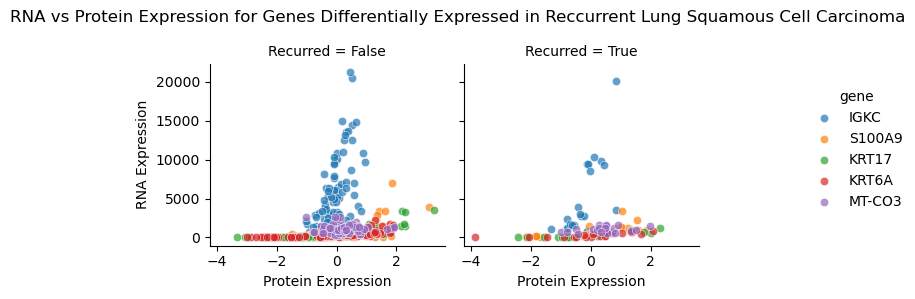

In [388]:
plotData = pd.DataFrame()
protein_expression=[]
rna_expression=[]
Recurrence_status=[]
gene_list=[]


for gene in mostDiffgenes[0]:
    protein_expression=protein_expression+(prot_shared_noRecurr[gene]).tolist()
    rna_expression=rna_expression+rna_shared_noRecurr[gene].tolist()
    Recurrence_status=Recurrence_status+[False for i in noRecurr.index]
    gene_list=gene_list+[gene for i in noRecurr.index]#noRecurr block for this gene.

    protein_expression=protein_expression+prot_shared_Recurr[gene].tolist()
    rna_expression=rna_expression+rna_shared_Recurr[gene].tolist()
    Recurrence_status=Recurrence_status+[True for i in Recurr.index]
    gene_list=gene_list+[gene for i in Recurr.index]#Recurr block for this gene.
plotData["Protein Expression"]=protein_expression
plotData["RNA Expression"]=rna_expression
plotData["Recurred"]=Recurrence_status
plotData["gene"]=gene_list
plot = sns.FacetGrid(plotData, col="Recurred", hue="gene")
plot.map(sns.scatterplot ,"Protein Expression","RNA Expression", alpha=.7)
plot.add_legend()
plot.fig.subplots_adjust(top=.8)
plot.fig.suptitle("RNA vs Protein Expression for Genes Differentially Expressed in Reccurrent Lung Squamous Cell Carcinoma")

## 2. Interpretation Skills
This section is short-answer based written responses. Please respond in 2-3 sentences to each question below for full credit.
1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
4. Why is proteomics data relatively scarce compared to sequencing data?
5. Should we ever expect protein expression to be 0 in a tumor sample?
6. What are protein domains and how do they relate to the role of a protein?


In [ ]:
# answer questions here
# 1. The numbers in the protein dataframe represent protein levels relative to the average 
# protein levels and log2 normalized. Scaling them by the average lets us see whether they are 
# different from normal levels, which is what we really care about over the actual numbers. The 
# normalization just makes it easier to visualize, with 0 meaning no difference, -1 meaning half 
# and 1 meaning double. The numbers in the transcroptimc database might be mRNA read counts of 
# each gene. I couldn't find confirmation of this, but based on their size and naming, that is what
# I suspect. If that is correct, then I do not know why they are presented that way. Perhaps the
# variability is too large to scale it in the same way.
# 2. The transcriptomics dataframe includes many sub columns of transcript location (maybe) that 
# make for many duplicates at the column level. The protein dataframe also had some duplicates,
# though I could not fathom why, but fewer.
# 3. The path from mRNA transcript to protein is not often one to one. Some transcripts last
# longer and or leash multiple ribosomes, and produce more peptides. Others might fall prey
# sooner to the constant predations of exonucleases and produce less. Many other steps, such as
# transportation, protection, etc can be regulated or interfered with, affecting the translation
# process. As for transcription, there are countless means of affecting that process. Messing with
# transcription factors is an example.
# 4. I suspect proteomics data is more scarce because it is harder to collect everything and 
# identify what is what. Most DNA has similar properties and can thus be caught in the same way.
# Once you have it, it can all be be identified, nowadays, with relative ease. RNA is a bit harder,
# as it is a fair bit more varied and volatile than DNA, but very doable, especially when you are only
# looking for mRNA. Proteins are far and away more varied though. They have too much variation for one
# technique to easily catch a good spread, let alone identify their countless permutations.
# 5. If a sample has 0 protein expression across the board someone fumbled the data collection or processing. 
# All tumours have proteins. It is possible to see 0 expression in some select genes though, if they are
# thoroughly silenced in the sample.
# 6. A protein domain is a globule of amino acids in the tertiary and quaternary structure of a protein that 
# performs some function. It is a distinct section of the protein structure. All proteins with proper structure 
# have a domain, even if, for a small protein, it might in whole be just the one. The properties and activities 
# of protein domains make protein function, allowing them to act in their roles. If they are lost, if the protein
# unfolds, it is inactivated.

## 3. Challenge Exercise - Incorporating Genomics
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
We can get somatic mutation data for cptac patients the same way we get proteomics, transcriptomical, or clinical. Let's explore some aspects of it.
1. Save the cancer somatic mutation data to `mutation_data`
2. Determine the top 10 most commonly mutated genes within the dataset.
3. Determine what percent of patients have a mutation in at least one of those genes.
4. Create a bar plot that shows percent percent of patients that have exactly 0-10 out of 10 of those mutations. Name axes and titles appropriately.

In [ ]:
# write code here